#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from tqdm import tqdm

In [2]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
plt.style.use('seaborn-whitegrid')

#### Address, axes initializations

In [4]:
pp = ## specify path

In [5]:
arch_mods = ['Cortical Microcircuit','No Feedback','Bidirectional Feedback',
             'Unidirectional Feedback','Same-sized Populations']

#### Initialise nRuns, n_epochs, noise values, PC dims, etc.

In [19]:
nRuns = 5
n_epochs = 50 ## Keep this the same Suhee!!

In [20]:
dims23 = np.array([1,2,4,8,16,32,64,80])
dims4 = np.array([1,2,4,8,16,32])
dims56 = np.array([1,2,4,8,16,32,64])

In [21]:
noise_stds = np.linspace(0,1,6)
noise_stds = np.round(noise_stds,3)
noise_stds = noise_stds[1:]

In [22]:
spatAccs = {}

spatAccs[arch_mods[0]] = np.load(pp+'corticalRNN-spatial-noisy-accs-lattice.npy')[:,1:] + 1e-6
spatAccs[arch_mods[1]] = np.load(pp+'no-fb-spatial-noisy-accs-lattice.npy')[:,1:] + 1e-6
spatAccs[arch_mods[2]] = np.load(pp+'bidirectional-fb-spatial-noisy-accs-lattice.npy')[:,1:] + 1e-6
spatAccs[arch_mods[3]] = np.load(pp+'unidirectional-fb-spatial-noisy-accs-lattice.npy')[:,1:] + 1e-6
spatAccs[arch_mods[4]] = np.load(pp+'same-pop-spatial-noisy-accs-lattice.npy')[:,1:] + 1e-6

In [23]:
cleanAccs = {}

cleanAccs[arch_mods[0]] = np.load(pp+'corticalRNN-no-violations-accs-lattice.npy')
cleanAccs[arch_mods[1]] = np.load(pp+'no-fb-no-violations-accs-lattice.npy')
cleanAccs[arch_mods[2]] = np.load(pp+'bidirectional-fb-no-violations-accs-lattice.npy')
cleanAccs[arch_mods[3]] = np.load(pp+'unidirectional-fb-no-violations-accs-lattice.npy')
cleanAccs[arch_mods[4]] = np.load(pp+'same-pop-no-violations-accs-lattice.npy')

#### Temporal violation plots

In [24]:
cleanAccs = {}

cleanAccs[arch_mods[0]] = np.load(pp+'corticalRNN-no-violations-accs-lattice.npy')
cleanAccs[arch_mods[1]] = np.load(pp+'no-fb-no-violations-accs-lattice.npy')
cleanAccs[arch_mods[2]] = np.load(pp+'bidirectional-fb-no-violations-accs-lattice.npy')
cleanAccs[arch_mods[3]] = np.load(pp+'unidirectional-fb-no-violations-accs-lattice.npy')
cleanAccs[arch_mods[4]] = np.load(pp+'same-pop-no-violations-accs-lattice.npy')

In [25]:
tempAccs = {}

tempAccs[arch_mods[0]] = np.load(pp+'corticalRNN-temporal-violations-accs-lattice.npy')
tempAccs[arch_mods[1]] = np.load(pp+'no-fb-temporal-violations-accs-lattice.npy')
tempAccs[arch_mods[2]] = np.load(pp+'bidirectional-fb-temporal-violations-accs-lattice.npy')
tempAccs[arch_mods[3]] = np.load(pp+'unidirectional-fb-temporal-violations-accs-lattice.npy')
tempAccs[arch_mods[4]] = np.load(pp+'same-pop-temporal-violations-accs-lattice.npy')

#### Spatial-Temporal joint plots

In [26]:
df_joint = pd.DataFrame(columns=['Run','Epoch','Architecture','Accuracy','Violation'])

In [27]:
for rr in range(nRuns):
    
    for cnt, mod in enumerate(arch_mods):
        
        for ee in range(n_epochs+1):
            
            arch_tp = [(k,v) for k,v in tempAccs.items()][cnt][0]
            
            acc_cl = [(k,v) for k,v in cleanAccs.items()][cnt][1][rr,ee]
            df_joint.loc[len(df_joint)] = [rr,ee,arch_tp,acc_cl,'Clean']
            
            acc_tp = [(k,v) for k,v in tempAccs.items()][cnt][1][rr,ee]
            df_joint.loc[len(df_joint)] = [rr,ee,arch_tp,acc_tp,'Temporal violation']
            
            for nn, noise in enumerate(noise_stds):
            
                arch_sp = [(k,v) for k,v in spatAccs.items()][cnt][0]

                acc_sp = [(k,v) for k,v in spatAccs.items()][cnt][1][rr,nn,ee]

                df_joint.loc[len(df_joint)] = [rr,ee,arch_sp,acc_sp,'Spatial violation']

In [28]:
df_joint_final = df_joint[df_joint["Epoch"] == 2]
df_joint_init = df_joint[df_joint["Epoch"] == 0]

In [29]:
cols_list = ['slategray','salmon','cornflowerblue']

Text(0.5, 1.0, 'Accuracy across Architectures in presence of Violations (Lattice Navigation)')

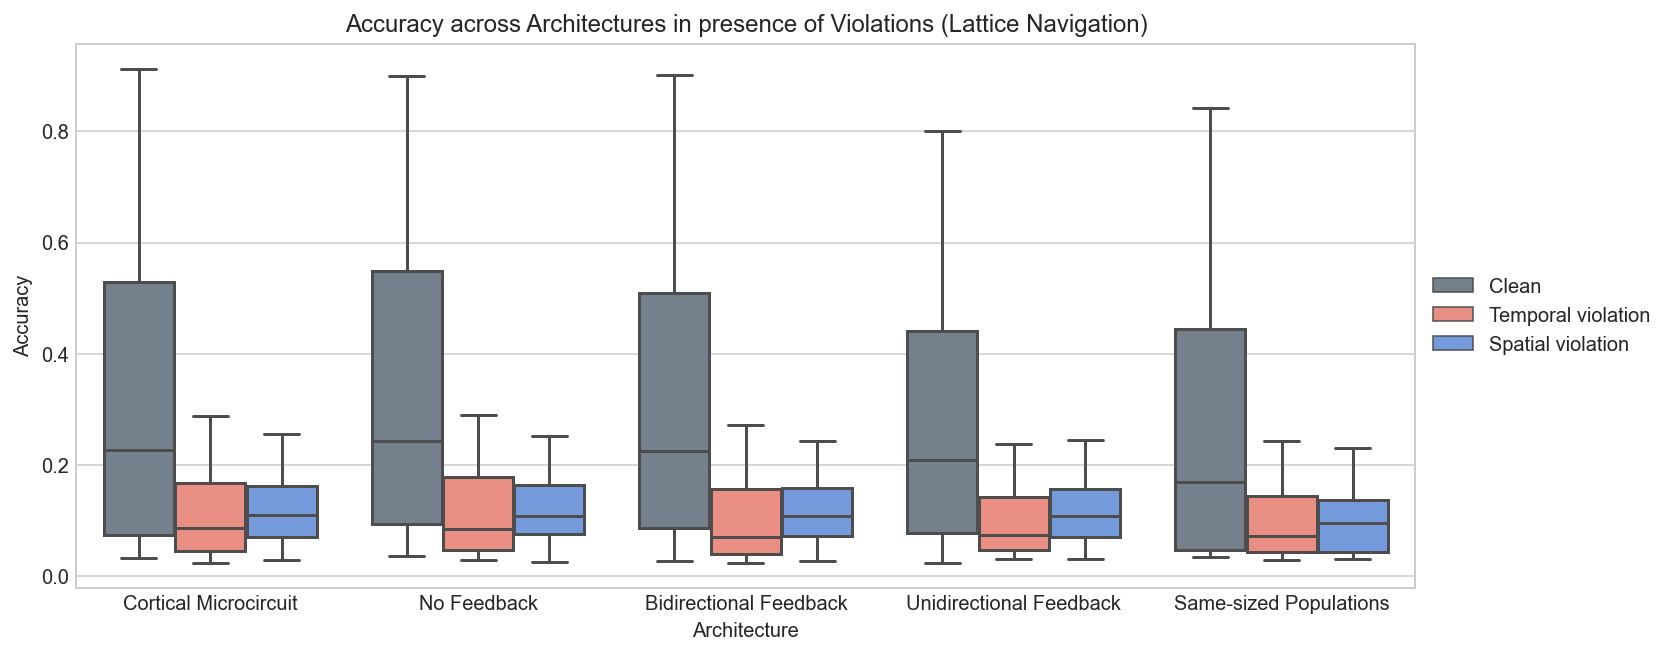

In [140]:
f_all = plt.figure(figsize=(12,5))
sns.boxplot(data=df_joint, x='Architecture', y='Accuracy', hue="Violation", palette=cols_list,
            dodge=True,fliersize=0.0,width=0.8,whis=1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Accuracy across Architectures in presence of Violations (Lattice Navigation)')

Text(0.5, 1.0, 'Accuracy across Architectures in presence of Violations (Lattice Navigation)')

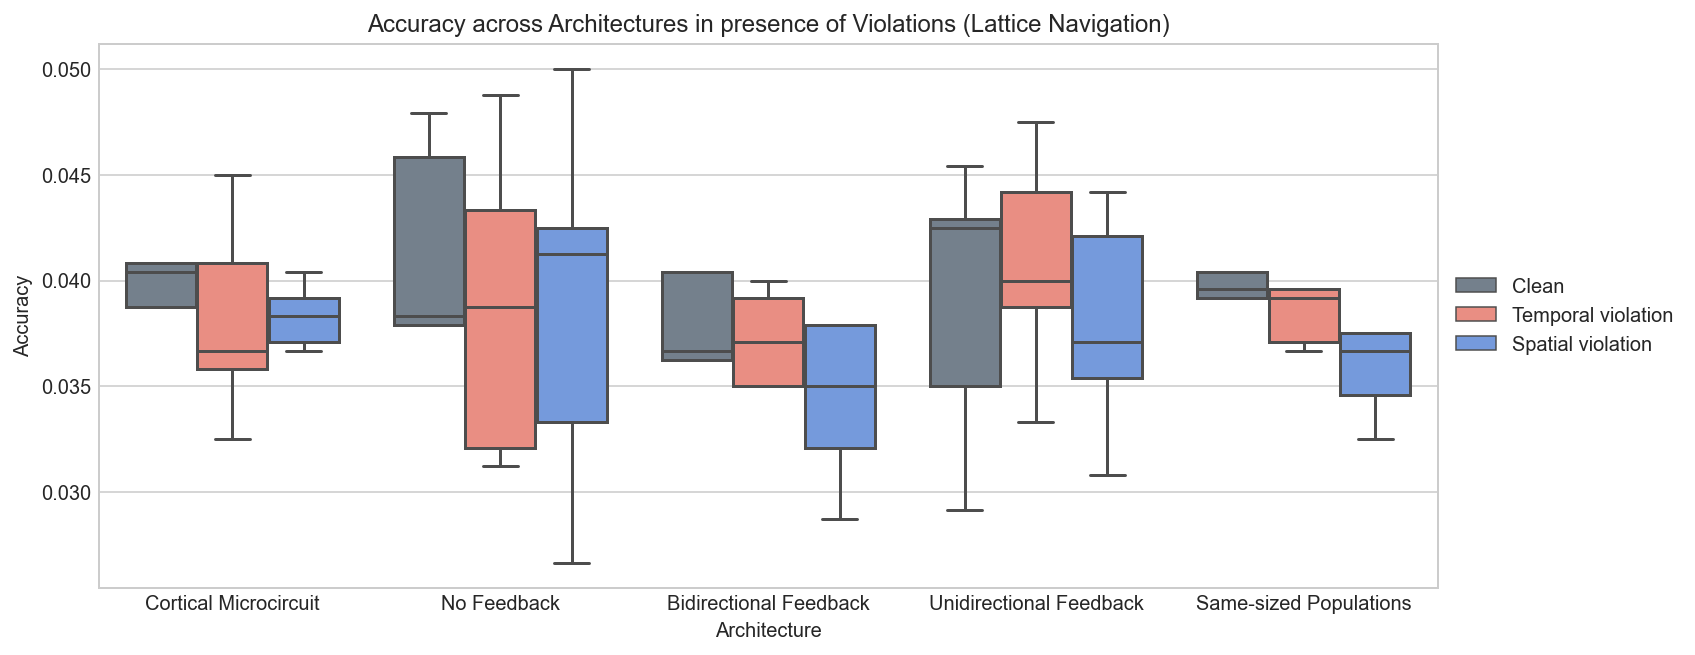

In [141]:
f_final = plt.figure(figsize=(12,5))
sns.boxplot(data=df_joint_final, x='Architecture', y='Accuracy', hue="Violation", palette=cols_list,
            dodge=True,fliersize=0.0,width=0.8,whis=1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Accuracy across Architectures in presence of Violations (Lattice Navigation)')

In [142]:
f_all.savefig('Accuracy-across-Violations-iclr-all-lattice.png',dpi=300,bbox_inches='tight')
f_all.savefig('Accuracy-across-Violations-iclr-all-lattice.svg',dpi=300,bbox_inches='tight')

In [143]:
f_final.savefig('Accuracy-across-Violations-iclr-final-lattice.png',dpi=300,bbox_inches='tight')
f_final.savefig('Accuracy-across-Violations-iclr-final-lattice.svg',dpi=300,bbox_inches='tight')

#### Dimensionality plots

In [30]:
rnnNames = ['L4','L23','L56','H4','H23','H56']

In [31]:
DGs = {}

for rnn in rnnNames:
    DGs[arch_mods[0],rnn] = np.load(pp+rnn+'DG_corticalRNN_lattice.npy')
    DGs[arch_mods[1],rnn] = np.load(pp+rnn+'DG_no-fb_lattice.npy')
    DGs[arch_mods[2],rnn] = np.load(pp+rnn+'DG_bidirectional-fb_lattice.npy')
    DGs[arch_mods[3],rnn] = np.load(pp+rnn+'DG_unidirectional-fb_lattice.npy')
    DGs[arch_mods[4],rnn] = np.load(pp+rnn+'DG_same-pop_lattice.npy')

In [32]:
df_dg = pd.DataFrame(columns=['Run','Epoch','Architecture','DG','RNN','Hierarchy'])

In [36]:
for cntr in range(len(rnnNames)*nRuns):
    
    arch = [(k,v) for k,v in DGs.items()][cntr][0][0]
    rnn = [(k,v) for k,v in DGs.items()][cntr][0][1]
        
    for rr in range(nRuns):
        for ee in range(n_epochs+1):
            
            dg = [(k,v) for k,v in DGs.items()][cntr][1][rr,ee]
            df_dg.loc[len(df_dg)] = [rr,ee,arch,dg,rnn,rnn[0]]

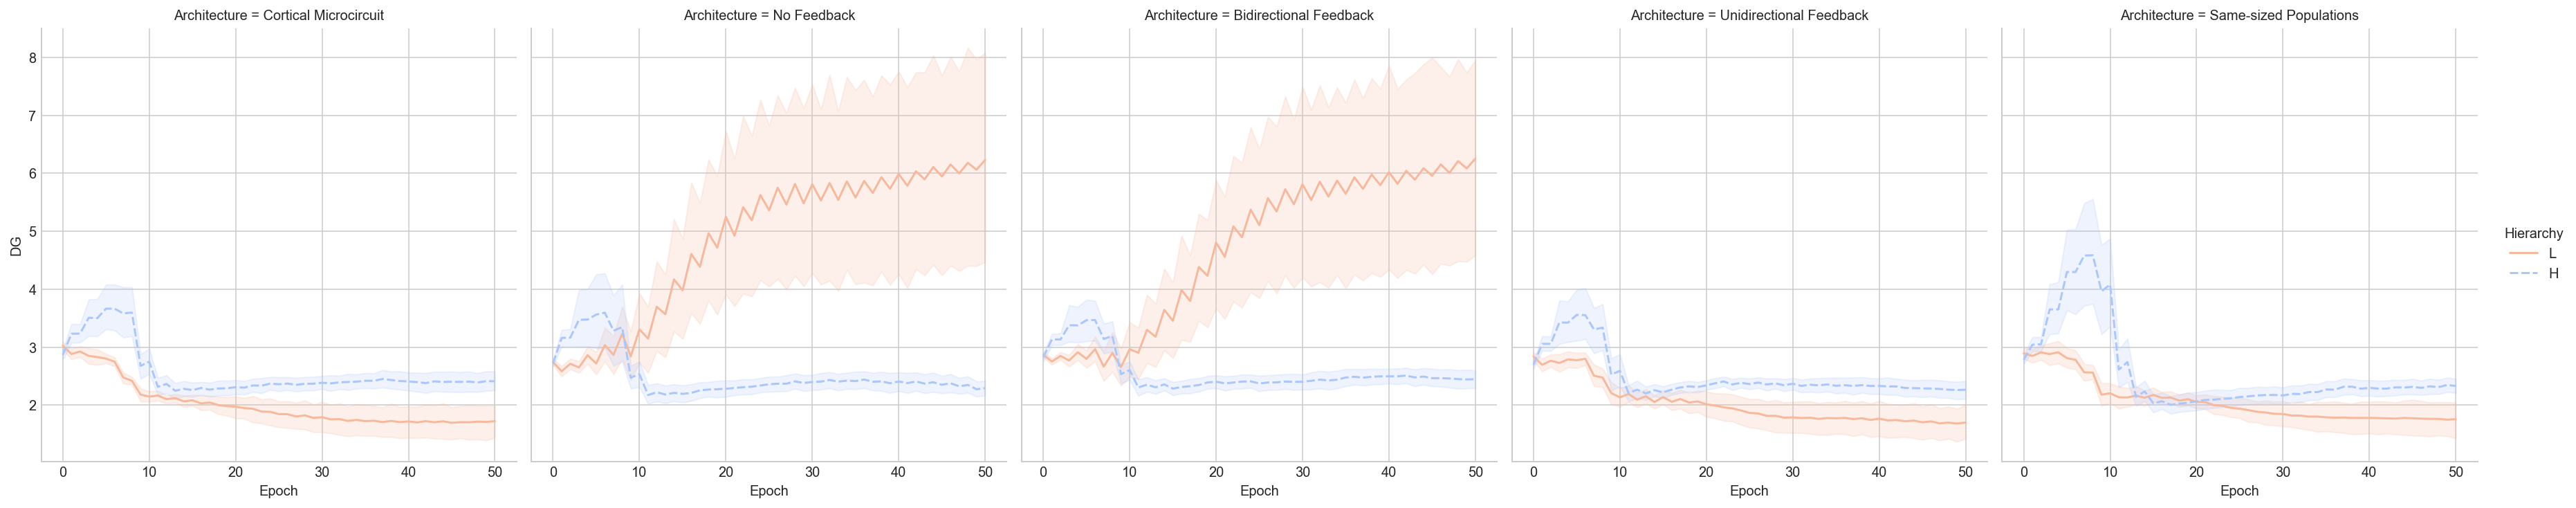

In [44]:
dg_plot = sns.relplot(data=df_dg, x='Epoch', y='DG', hue="Hierarchy", palette='coolwarm_r',kind='line',ci=80,
            style="Hierarchy",col="Architecture",height=5, aspect=1)

Text(0.5, 1.05, 'Dimensionality Gain across Architectures (Lattice Navigation)')

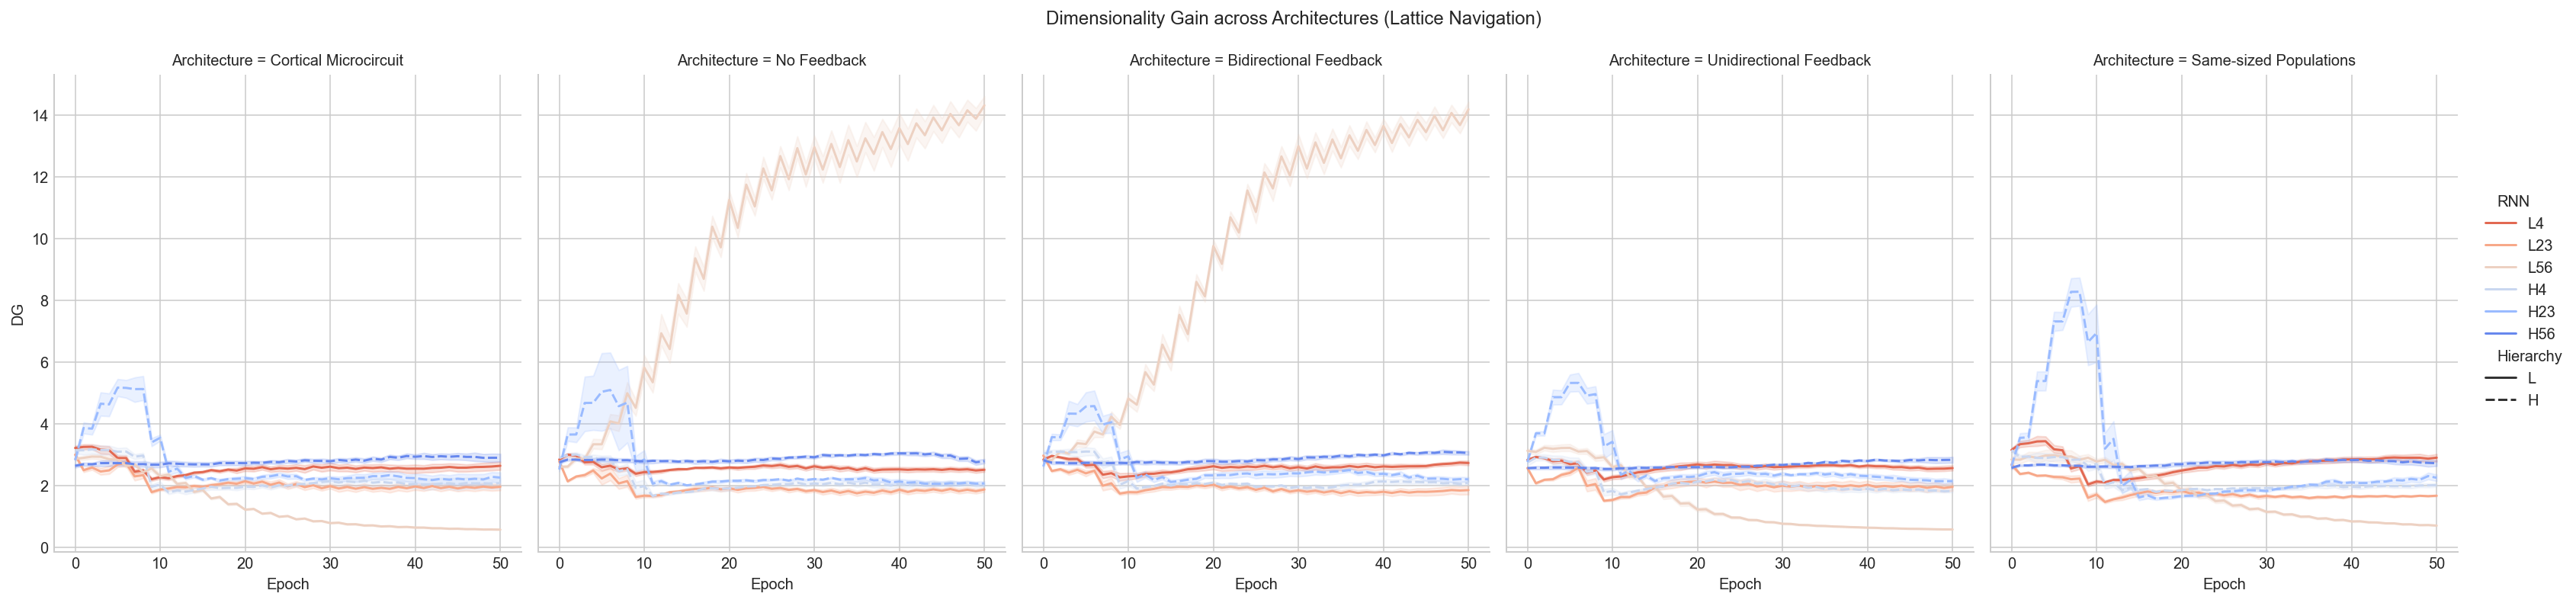

In [41]:
dg2_plot = sns.relplot(data=df_dg, x='Epoch', y='DG', hue="RNN", palette='coolwarm_r',kind='line',ci=60,
            style="Hierarchy",col="Architecture",height=5, aspect=0.9)
dg2_plot.fig.suptitle('Dimensionality Gain across Architectures (Lattice Navigation)',y=1.05)

In [42]:
dg_plot.savefig('DG-across-archs-iclr-lattice.png',dpi=300,bbox_inches='tight')
dg_plot.savefig('DG-across-archs-iclr-lattice.svg',dpi=300,bbox_inches='tight')

In [43]:
dg2_plot.savefig('DG-across-archs-iclr-lattice-layers.png',dpi=300,bbox_inches='tight')
dg2_plot.savefig('DG-across-archs-iclr-lattice-layers.svg',dpi=300,bbox_inches='tight')

#### Decodability

In [45]:
accs_temp_img = {}

for rnn in rnnNames:
    accs_temp_img[arch_mods[0],rnn] = np.load(pp+'accs_img_temp_'+rnn+'-corticalRNN-lattice.npy',allow_pickle=True)
    accs_temp_img[arch_mods[1],rnn] = np.load(pp+'accs_img_temp_'+rnn+'-no-fb-lattice.npy',allow_pickle=True)
    accs_temp_img[arch_mods[2],rnn] = np.load(pp+'accs_img_temp_'+rnn+'-bidirectional-fb-lattice.npy',allow_pickle=True)
    accs_temp_img[arch_mods[3],rnn] = np.load(pp+'accs_img_temp_'+rnn+'-unidirectional-fb-lattice.npy',allow_pickle=True)
    accs_temp_img[arch_mods[4],rnn] = np.load(pp+'accs_img_temp_'+rnn+'-same-pop-lattice.npy',allow_pickle=True)

In [46]:
accs_temp_pos = {}

for rnn in rnnNames:
    accs_temp_pos[arch_mods[0],rnn] = np.load(pp+'accs_pos_temp_'+rnn+'-corticalRNN-lattice.npy',allow_pickle=True)
    accs_temp_pos[arch_mods[1],rnn] = np.load(pp+'accs_pos_temp_'+rnn+'-no-fb-lattice.npy',allow_pickle=True)
    accs_temp_pos[arch_mods[2],rnn] = np.load(pp+'accs_pos_temp_'+rnn+'-bidirectional-fb-lattice.npy',allow_pickle=True)
    accs_temp_pos[arch_mods[3],rnn] = np.load(pp+'accs_pos_temp_'+rnn+'-unidirectional-fb-lattice.npy',allow_pickle=True)
    accs_temp_pos[arch_mods[4],rnn] = np.load(pp+'accs_pos_temp_'+rnn+'-same-pop-lattice.npy',allow_pickle=True)

In [47]:
accs_temp_surp = {}

for rnn in rnnNames:
    accs_temp_surp[arch_mods[0],rnn] = np.load(pp+'accs_surp_temp_'+rnn+'-corticalRNN-lattice.npy',allow_pickle=True)
    accs_temp_surp[arch_mods[1],rnn] = np.load(pp+'accs_surp_temp_'+rnn+'-no-fb-lattice.npy',allow_pickle=True)
    accs_temp_surp[arch_mods[2],rnn] = np.load(pp+'accs_surp_temp_'+rnn+'-bidirectional-fb-lattice.npy',allow_pickle=True)
    accs_temp_surp[arch_mods[3],rnn] = np.load(pp+'accs_surp_temp_'+rnn+'-unidirectional-fb-lattice.npy',allow_pickle=True)
    accs_temp_surp[arch_mods[4],rnn] = np.load(pp+'accs_surp_temp_'+rnn+'-same-pop-lattice.npy',allow_pickle=True)

In [48]:
preds_temp_surp = {}

for rnn in rnnNames:
    preds_temp_surp[arch_mods[0],rnn] = np.load(pp+'preds_surp_temp_'+rnn+'-corticalRNN-lattice.npy',allow_pickle=True)
    preds_temp_surp[arch_mods[1],rnn] = np.load(pp+'preds_surp_temp_'+rnn+'-no-fb-lattice.npy',allow_pickle=True)
    preds_temp_surp[arch_mods[2],rnn] = np.load(pp+'preds_surp_temp_'+rnn+'-bidirectional-fb-lattice.npy',allow_pickle=True)
    preds_temp_surp[arch_mods[3],rnn] = np.load(pp+'preds_surp_temp_'+rnn+'-unidirectional-fb-lattice.npy',allow_pickle=True)
    preds_temp_surp[arch_mods[4],rnn] = np.load(pp+'preds_surp_temp_'+rnn+'-same-pop-lattice.npy',allow_pickle=True)

In [49]:
df_temp_img = pd.DataFrame(columns=['Run','Epoch','Architecture','Accuracy','PC Dimension','RNN','Hierarchy'])
df_temp_pos = pd.DataFrame(columns=['Run','Epoch','Architecture','Accuracy','PC Dimension','RNN','Hierarchy'])
df_temp_surp = pd.DataFrame(columns=['Run','Epoch','Architecture','Accuracy','PC Dimension','RNN','Hierarchy'])

In [50]:
for cntr in tqdm(range(len(rnnNames)*nRuns)):
    
    arch = [(k,v) for k,v in accs_temp_img.items()][cntr][0][0]
    rnn = [(k,v) for k,v in accs_temp_img.items()][cntr][0][1]
        
    for rr in range(nRuns):
        for ee in range(3):
            
            if rnn[-1]=='4':
                for pc in dims4:
                    acc = [(k,v) for k,v in accs_temp_img.items()][cntr][1].item()[rr,pc,ee]
                    df_temp_img.loc[len(df_temp_img)] = [rr,ee,arch,acc,pc,rnn,rnn[0]]
            elif rnn[-1]=='6':
                for pc in dims56:
                    acc = [(k,v) for k,v in accs_temp_img.items()][cntr][1].item()[rr,pc,ee]
                    df_temp_img.loc[len(df_temp_img)] = [rr,ee,arch,acc,pc,rnn,rnn[0]]
            else:
                for pc in dims23:
                    acc = [(k,v) for k,v in accs_temp_img.items()][cntr][1].item()[rr,pc,ee]
                    df_temp_img.loc[len(df_temp_img)] = [rr,ee,arch,acc,pc,rnn,rnn[0]]

  0%|          | 0/30 [00:00<?, ?it/s]100%|██████████| 30/30 [00:06<00:00,  4.65it/s]


In [51]:
for cntr in tqdm(range(len(rnnNames)*nRuns)):
    
    arch = [(k,v) for k,v in accs_temp_pos.items()][cntr][0][0]
    rnn = [(k,v) for k,v in accs_temp_pos.items()][cntr][0][1]
        
    for rr in range(nRuns):
        for ee in range(3):
            
            if rnn[-1]=='4':
                for pc in dims4:
                    acc = [(k,v) for k,v in accs_temp_pos.items()][cntr][1].item()[rr,pc,ee]
                    df_temp_pos.loc[len(df_temp_pos)] = [rr,ee,arch,acc,pc,rnn,rnn[0]]
            elif rnn[-1]=='6':
                for pc in dims56:
                    acc = [(k,v) for k,v in accs_temp_pos.items()][cntr][1].item()[rr,pc,ee]
                    df_temp_pos.loc[len(df_temp_pos)] = [rr,ee,arch,acc,pc,rnn,rnn[0]]
                    
            else:
                for pc in dims23:
                    acc = [(k,v) for k,v in accs_temp_pos.items()][cntr][1].item()[rr,pc,ee]
                    df_temp_pos.loc[len(df_temp_pos)] = [rr,ee,arch,acc,pc,rnn,rnn[0]]

100%|██████████| 30/30 [00:06<00:00,  4.74it/s]


In [52]:
for cntr in tqdm(range(len(rnnNames)*nRuns)):
    
    arch = [(k,v) for k,v in accs_temp_surp.items()][cntr][0][0]
    rnn = [(k,v) for k,v in accs_temp_surp.items()][cntr][0][1]
        
    for rr in range(nRuns):
        for ee in range(3):
            
            if rnn[-1]=='4':
                for pc in dims4:
                    acc = [(k,v) for k,v in accs_temp_surp.items()][cntr][1].item()[rr,pc,ee]
                    df_temp_surp.loc[len(df_temp_surp)] = [rr,ee,arch,acc,pc,rnn,rnn[0]]
            elif rnn[-1]=='6':
                for pc in dims56:
                    acc = [(k,v) for k,v in accs_temp_surp.items()][cntr][1].item()[rr,pc,ee]
                    df_temp_surp.loc[len(df_temp_surp)] = [rr,ee,arch,acc,pc,rnn,rnn[0]]
            else:
                for pc in dims23:
                    acc = [(k,v) for k,v in accs_temp_surp.items()][cntr][1].item()[rr,pc,ee]
                    df_temp_surp.loc[len(df_temp_surp)] = [rr,ee,arch,acc,pc,rnn,rnn[0]]

100%|██████████| 30/30 [00:06<00:00,  4.68it/s]


#### Decoding surprise at init

In [53]:
arch_mods

['Cortical Microcircuit',
 'No Feedback',
 'Bidirectional Feedback',
 'Unidirectional Feedback',
 'Same-sized Populations']

In [54]:
ix = df_temp_surp['Epoch'] == 0
df_init_surp = df_temp_surp[ix]

In [55]:
ixFB = np.hstack((
                  (np.where((df_init_surp['RNN']=='L23')*(df_init_surp['Architecture']==arch_mods[0])>0)[0]),
    (np.where((df_init_surp['RNN']=='L56')*(df_init_surp['Architecture']==arch_mods[0])>0)[0]),
    (np.where((df_init_surp['RNN']=='L23')*(df_init_surp['Architecture']==arch_mods[2])>0)[0]),
    (np.where((df_init_surp['RNN']=='L56')*(df_init_surp['Architecture']==arch_mods[3])>0)[0]),
    (np.where((df_init_surp['RNN']=='L23')*(df_init_surp['Architecture']==arch_mods[4])>0)[0]),
    (np.where((df_init_surp['RNN']=='L56')*(df_init_surp['Architecture']==arch_mods[4])>0)[0])
))

ixFB = ixFB.ravel()
fb_indicator = np.array(['Other']*len(df_init_surp))
fb_indicator[ixFB] = 'FB'
fb_indicator = list(fb_indicator)

c:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expres

In [56]:
df_init_surp['Feedback Indicator'] = fb_indicator

<ipython-input-56-47c825ac2eb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_init_surp['Feedback Indicator'] = fb_indicator


Text(0.5, 1.0, 'Temporal Unexpectedness Decoding Accuracy across Architectures at Initialization')

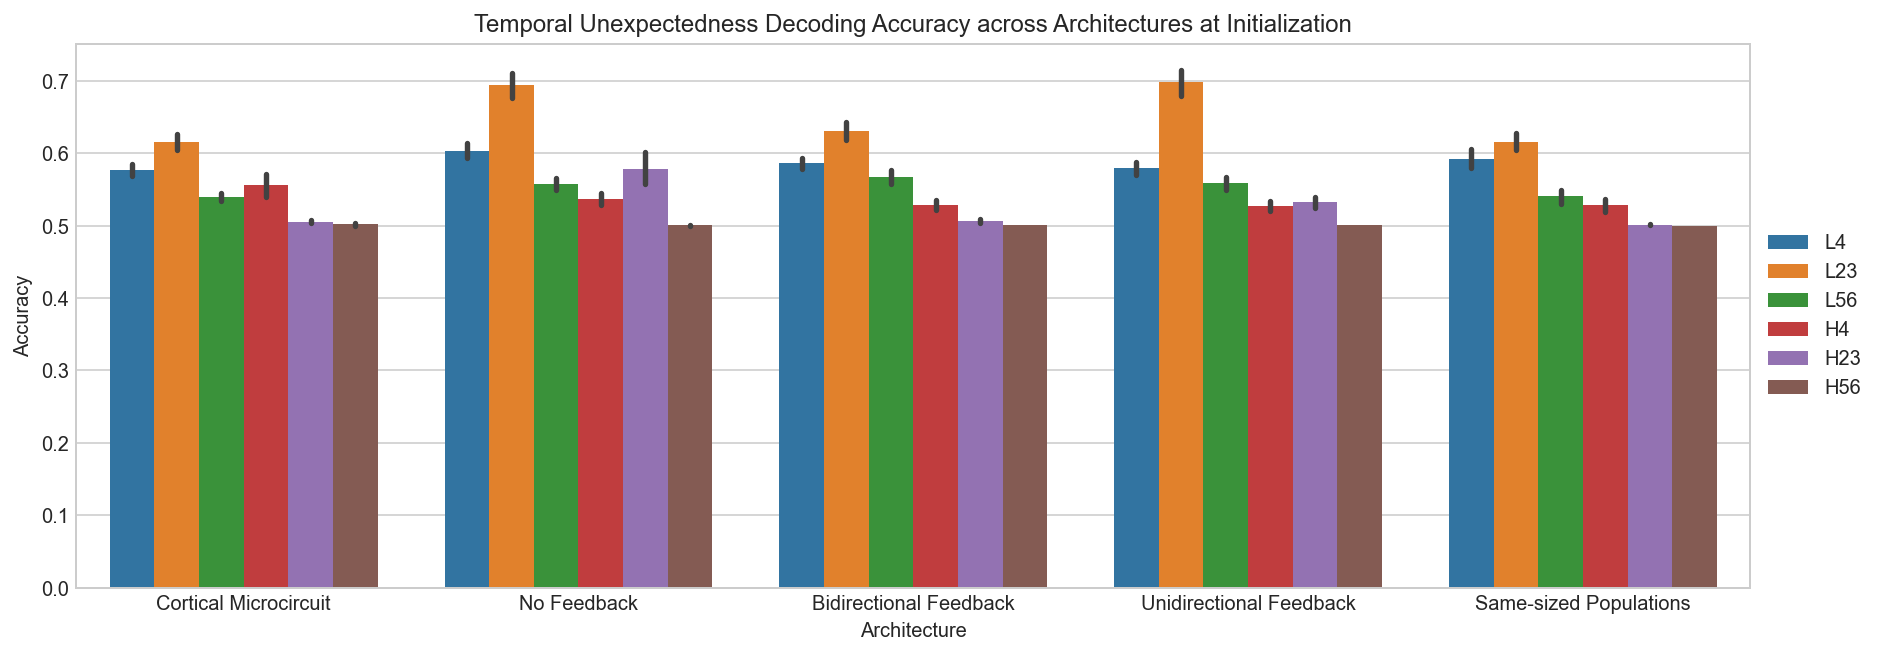

In [164]:
f = plt.figure(figsize=(15,5))
sns.barplot(data=df_temp_surp[ix], x='Architecture', y='Accuracy', hue="RNN", palette='tab10',ci=50)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Temporal Unexpectedness Decoding Accuracy across Architectures at Initialization')

In [165]:
cols_dark = ['#1b9e77','#d95f02']
cols_dark_r = ['#7570b3','#1b9e77']

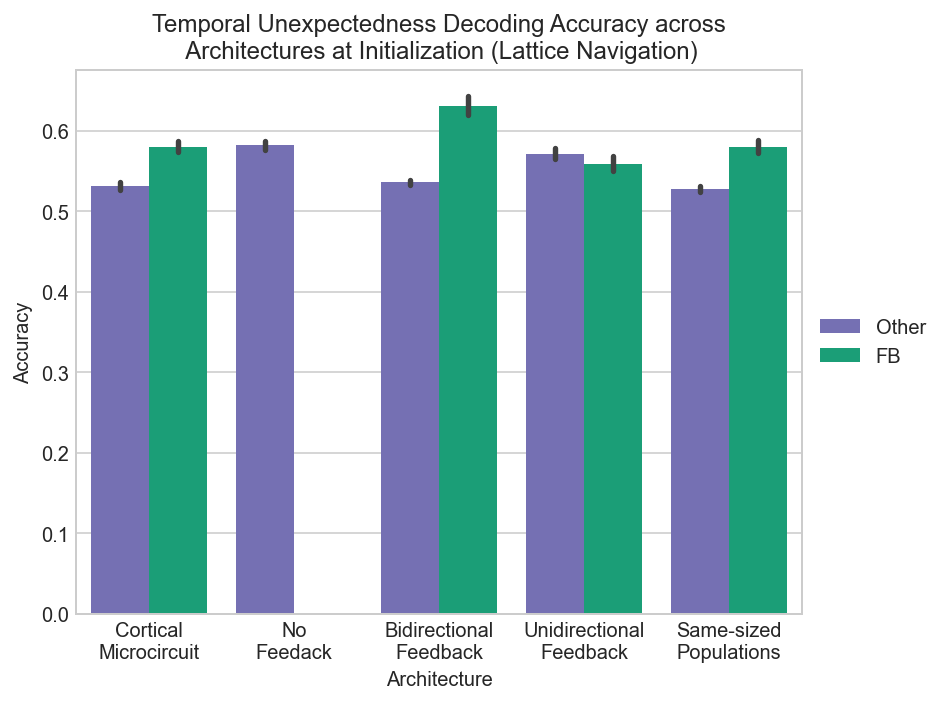

In [166]:
fsurpinit = plt.figure(figsize=(6.5,5))
sns.barplot(data=df_init_surp, x='Architecture', y='Accuracy', hue="Feedback Indicator", palette=cols_dark_r,ci=50,saturation=1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Temporal Unexpectedness Decoding Accuracy across\n Architectures at Initialization (Lattice Navigation)')
plt.xticks(np.arange(len(arch_mods)),
           ['Cortical\nMicrocircuit','No\nFeedack','Bidirectional\nFeedback',
            'Unidirectional\nFeedback','Same-sized\nPopulations'])
plt.show()

In [167]:
fsurpinit.savefig('Accs-surp-init-across-archs-iclr-lattice.png',dpi=300,bbox_inches='tight')
fsurpinit.savefig('Accs-surp-init-across-archs-iclr-lattice.svg',dpi=300,bbox_inches='tight')

#### Joint temporal violin plots

In [57]:
ix_img = df_temp_img['Architecture'] == arch_mods[0]
ix_pos = df_temp_pos['Architecture'] == arch_mods[0]
ix_surp = df_temp_surp['Architecture'] == arch_mods[0]

In [58]:
df_temporal_violations = pd.concat([df_temp_img[ix_img], df_temp_pos[ix_pos], df_temp_surp[ix_surp]])

In [59]:
df_temporal_violations['Decoding Variable'] = ['Input ID (Temporal Violation)']*sum(ix_img) + ['Temporal Position']*sum(ix_pos) + ['Temporal Surprise']*sum(ix_surp)

In [60]:
df_temporal_violations_final = df_temporal_violations[df_temporal_violations["Epoch"]==2]
df_temporal_violations_init = df_temporal_violations[df_temporal_violations["Epoch"]==0]

Text(0.5, 1.0, 'Decoding Accuracies in the Cortical Microcircuit across Task variables (Lattice Navigation - All)')

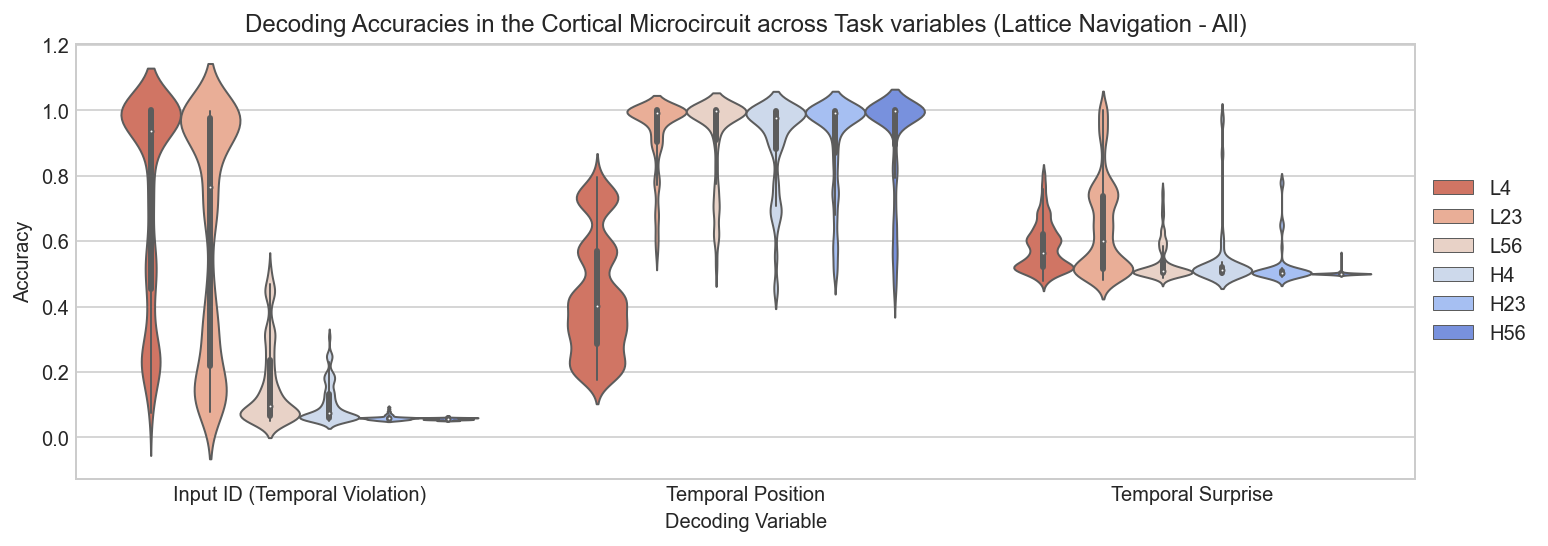

In [61]:
figTaskVariables_all = plt.figure(figsize=(12,4))
sns.violinplot(data=df_temporal_violations, x='Decoding Variable', y='Accuracy', hue="RNN", palette='coolwarm_r',
            dodge=True,fliersize=0.0,width=0.8,whis=0.5,bw=0.2,scale='width',linewidth=1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Decoding Accuracies in the Cortical Microcircuit across Task variables (Lattice Navigation - All)')

Text(0.5, 1.0, 'Decoding Accuracies in the Cortical Microcircuit across Task variables (Lattice Navigation - Init)')

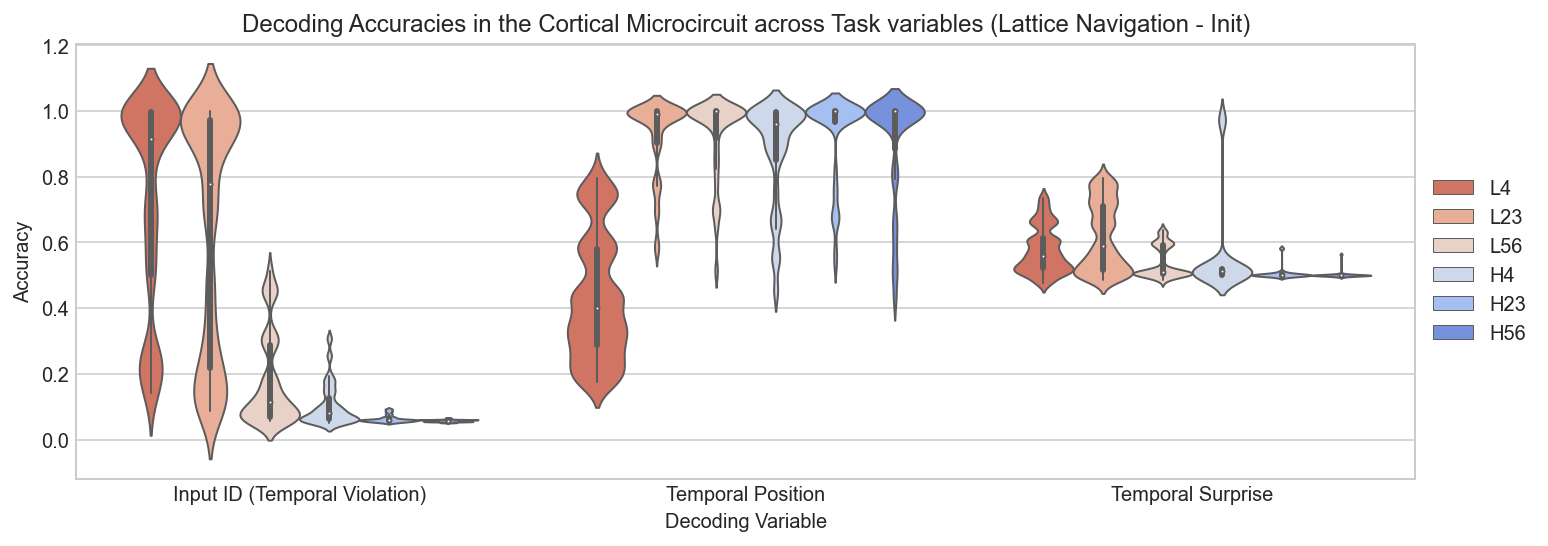

In [62]:
figTaskVariables_init = plt.figure(figsize=(12,4))
sns.violinplot(data=df_temporal_violations_init, x='Decoding Variable', y='Accuracy', hue="RNN", palette='coolwarm_r',
            dodge=True,fliersize=0.0,width=0.8,whis=0.5,bw=0.2,scale='width',linewidth=1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Decoding Accuracies in the Cortical Microcircuit across Task variables (Lattice Navigation - Init)')

Text(0.5, 1.0, 'Decoding Accuracies in the Cortical Microcircuit across Task variables (Lattice Navigation - Final)')

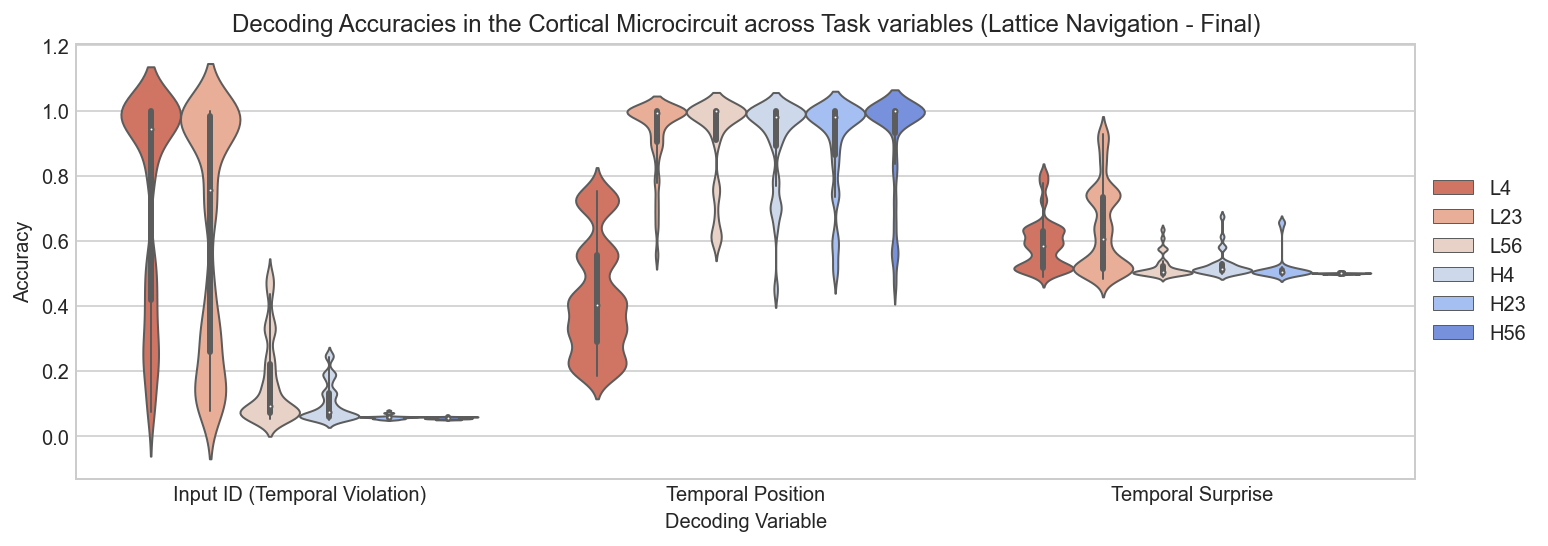

In [63]:
figTaskVariables_final = plt.figure(figsize=(12,4))
sns.violinplot(data=df_temporal_violations_final, x='Decoding Variable', y='Accuracy', hue="RNN", palette='coolwarm_r',
            dodge=True,fliersize=0.0,width=0.8,whis=0.5,bw=0.2,scale='width',linewidth=1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Decoding Accuracies in the Cortical Microcircuit across Task variables (Lattice Navigation - Final)')

In [64]:
figTaskVariables_all.savefig('Accs-across-task-vars-iclr-all-lattice.png',dpi=300,bbox_inches='tight')
figTaskVariables_all.savefig('Accs-across-task-vars-iclr-all-lattice.svg',dpi=300,bbox_inches='tight')

In [65]:
figTaskVariables_init.savefig('Accs-across-task-vars-iclr-init-lattice.png',dpi=300,bbox_inches='tight')
figTaskVariables_init.savefig('Accs-across-task-vars-iclr-init-lattice.svg',dpi=300,bbox_inches='tight')

In [66]:
figTaskVariables_final.savefig('Accs-across-task-vars-iclr-final-lattice.png',dpi=300,bbox_inches='tight')
figTaskVariables_final.savefig('Accs-across-task-vars-iclr-final-lattice.svg',dpi=300,bbox_inches='tight')